# Symmetrizing data using the Symmetrizer classes

## Import functions

In [1]:
from nxs_analysis_tools import load_transform, plot_slice
from nxs_analysis_tools.pairdistribution import Symmetrizer3D, Symmetrizer2D
from nxs_analysis_tools.datasets import cubic

sample_directory = cubic(temperatures=[300]) # Download example data and store in cache directory

## Load data

In [2]:
data = load_transform(f'{sample_directory}/cubic_300.nxs')

data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)


## The `Symmetrizer2D` class

A `Symmetrizer2D` object can be initialized by defining a `theta_min` and `theta_max` representing the range of angles (clockwise relative the y-axis) which define the region to use for symmetrization.

In [3]:
s2d = Symmetrizer2D(theta_min=0, theta_max=45)

Because data is not specified, the `Symmetrizer2D` object can be applied to any `NXdata` object. Perform the symmetrization using the `.symmetrize_2d()` method.

In [4]:
symmetrized_data = s2d.symmetrize_2d(data[:,:,0.0])

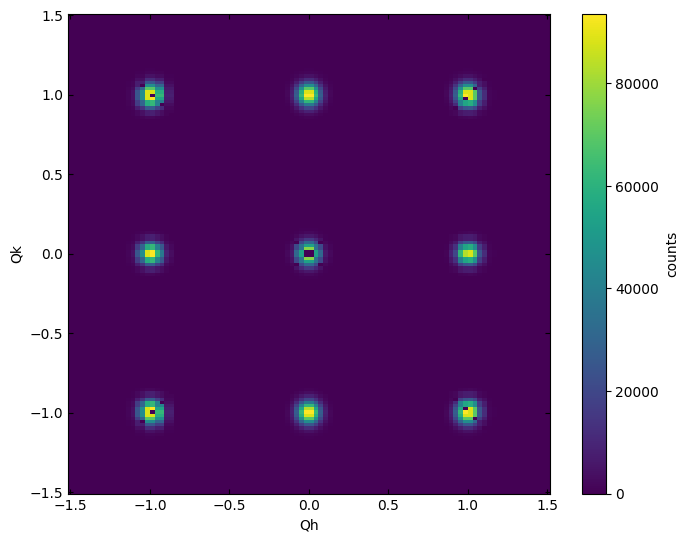

In [5]:
plot_slice(symmetrized_data)

### Viewing the symmetrization mask

The symmetrization mask for the most recent symmetrized dataset is stored in `symmetrization_mask`

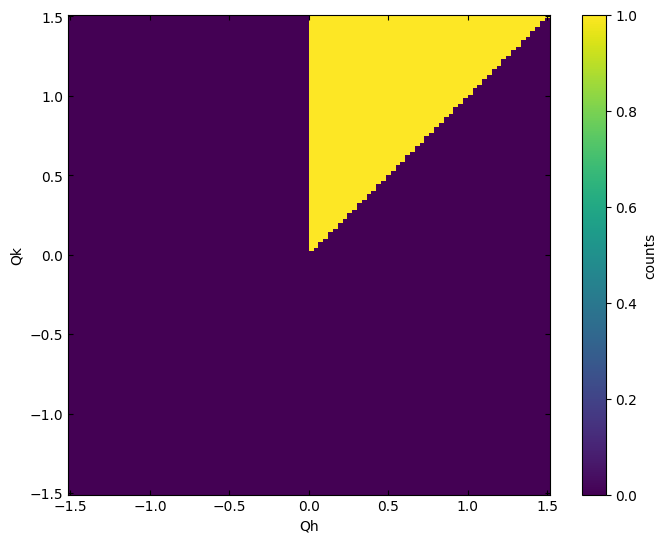

In [6]:
plot_slice(data=s2d.symmetrization_mask)

### Viewing the wedge used for symmetrization

The `.wedge` attribute stores the wedge of data used to recreate the entire dataset.

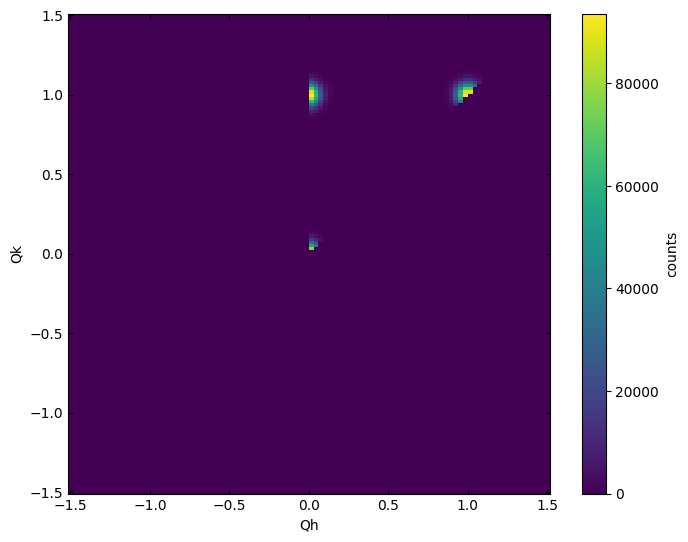

In [7]:
plot_slice(s2d.wedge)

### The mirror operation

The optional Boolean parameter `mirror` applies a mirror transformation to the wedge before it is rotated around the origin to reconstruct the dataset. The default value is `True`, in order to preserve the mirror symmetry common to diffraction patterns. If false, the wedge is rotated enough times to recreate all 360 degrees of the plane. 

Here, the effect is noticeable because the wedge is only 45 degrees, and 8-fold rotational symmtery is not present in the parent dataset.

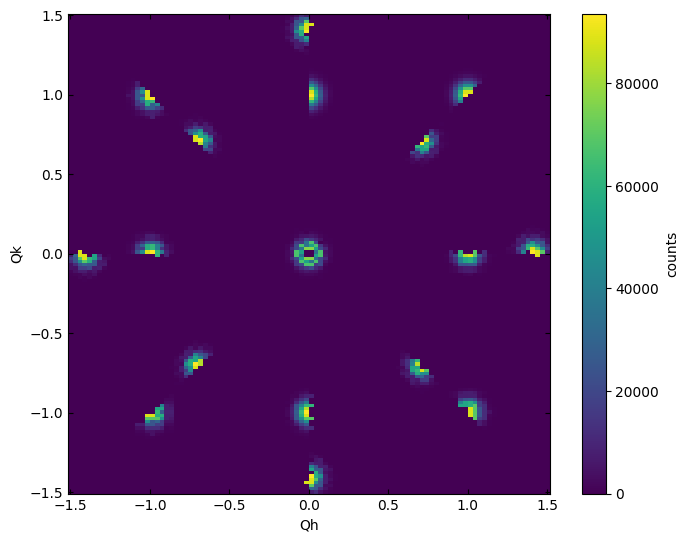

In [8]:
s2d = Symmetrizer2D(theta_min=0, theta_max=45, mirror=False)
plot_slice(s2d.symmetrize_2d(data[:,:,0.0]))

Here, we change the wedge to cover 90 degrees, and since 4-fold rotation is present in the parent dataset the symmetrization produces the expected result.

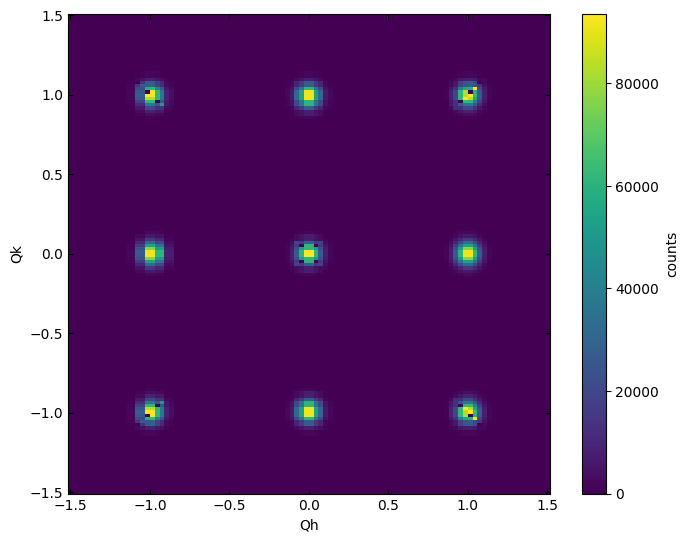

In [9]:
s2d = Symmetrizer2D(theta_min=45, theta_max=135, mirror=False)
plot_slice(s2d.symmetrize_2d(data[:,:,0.0]))

### The `test` function

Use the `.test()` method to visualize an overview of the symmetrization process, including the raw data, symmetrization mask, wedge, and reconstructed dataset.

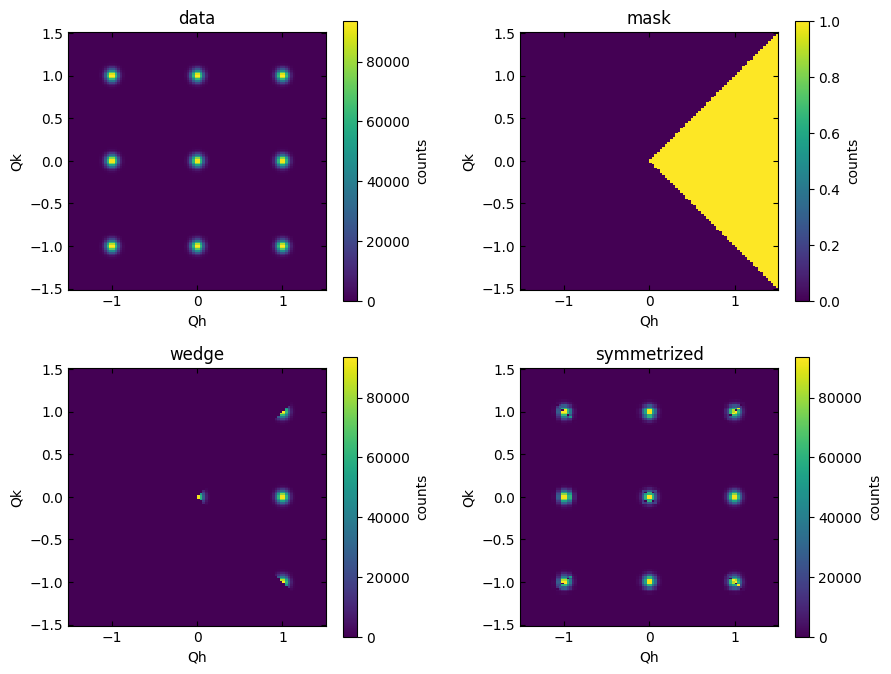

(<Figure size 1000x800 with 8 Axes>,
 array([[<Axes: title={'center': 'data'}, xlabel='Qh', ylabel='Qk'>,
         <Axes: title={'center': 'mask'}, xlabel='Qh', ylabel='Qk'>],
        [<Axes: title={'center': 'wedge'}, xlabel='Qh', ylabel='Qk'>,
         <Axes: title={'center': 'symmetrized'}, xlabel='Qh', ylabel='Qk'>]],
       dtype=object))

In [10]:
s2d.test(data[:,:,0.0])

## The `Symmetrizer3D` class

The `Symmetrizer3D` class wraps three instances of the `Symmetrizer2D` class, which represent the three primary cross-sections of the dataset, called "Plane 1", "Plane 2", and "Plane 3".

In [11]:
s = Symmetrizer3D(data)

Plane 1: QhQk
Plane 2: QhQl
Plane 3: QkQl


Each `Symmetrizer2D` object is then accessible via the attributes `.plane1symmetrizer`, etc.

In [12]:
s.plane1symmetrizer

The parameters for each `Symmetrizer2D` object can then be set in the usual way.

In [13]:
s.plane1symmetrizer.set_parameters(theta_min=0, theta_max=90, mirror=True)

The `.test()` method of the `Symmetrizer2D` class should be used to verify the symmetry operations on each plane.

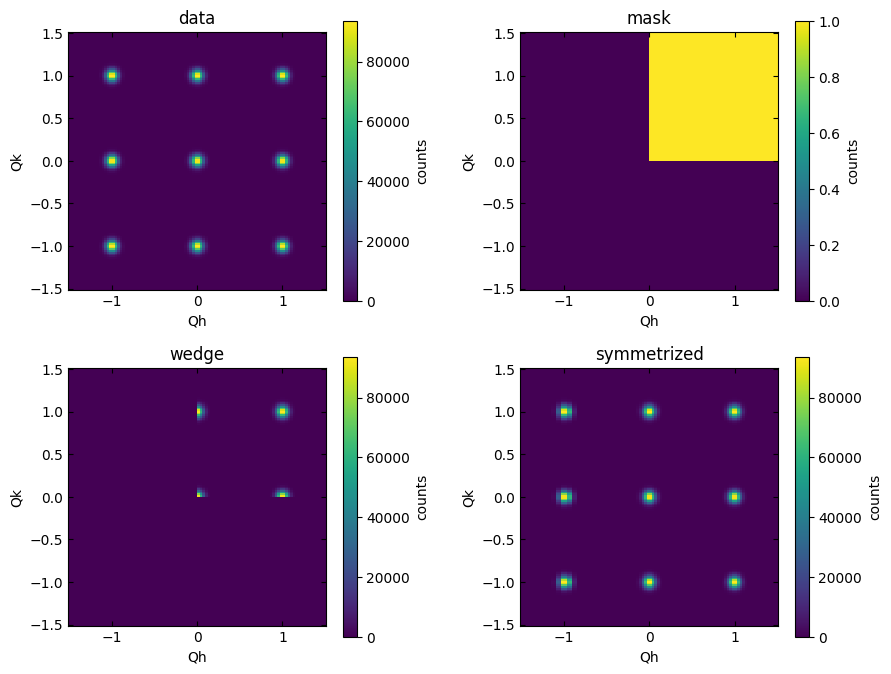

(<Figure size 1000x800 with 8 Axes>,
 array([[<Axes: title={'center': 'data'}, xlabel='Qh', ylabel='Qk'>,
         <Axes: title={'center': 'mask'}, xlabel='Qh', ylabel='Qk'>],
        [<Axes: title={'center': 'wedge'}, xlabel='Qh', ylabel='Qk'>,
         <Axes: title={'center': 'symmetrized'}, xlabel='Qh', ylabel='Qk'>]],
       dtype=object))

In [14]:
s.plane1symmetrizer.test(data[:,:,len(data.Ql)//2])

Once the `Symmetrizer2D` objects for each plane have been initialized, the `.symmetrize()` method of the `Symmetrize3D` object can be used to perform the full symmetrization.

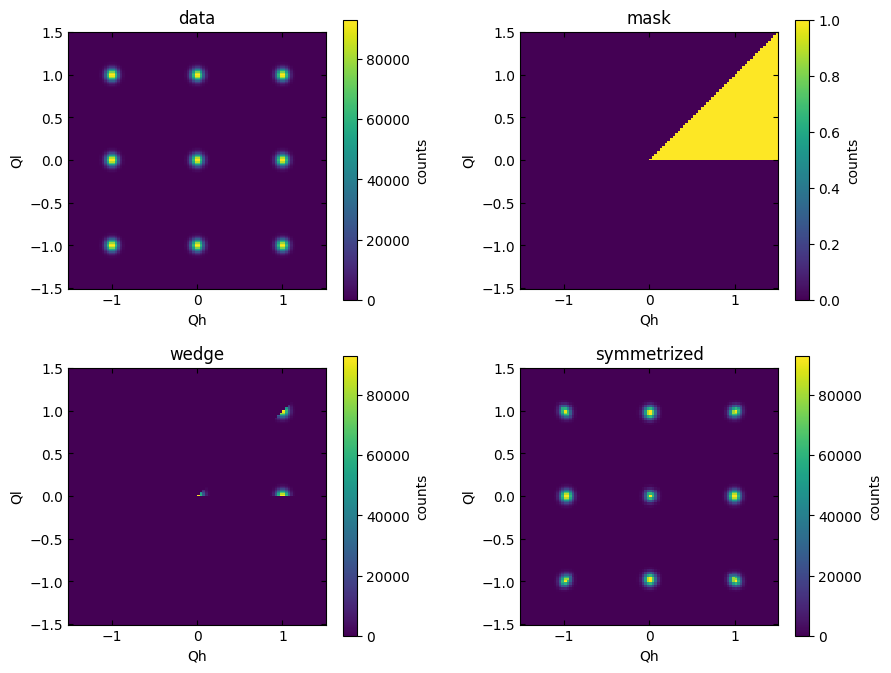

(<Figure size 1000x800 with 8 Axes>,
 array([[<Axes: title={'center': 'data'}, xlabel='Qh', ylabel='Ql'>,
         <Axes: title={'center': 'mask'}, xlabel='Qh', ylabel='Ql'>],
        [<Axes: title={'center': 'wedge'}, xlabel='Qh', ylabel='Ql'>,
         <Axes: title={'center': 'symmetrized'}, xlabel='Qh', ylabel='Ql'>]],
       dtype=object))

In [15]:
s.plane2symmetrizer.set_parameters(theta_min=45, theta_max=90, mirror=True)
s.plane2symmetrizer.test(data[:,len(data.Qk)//2,:])

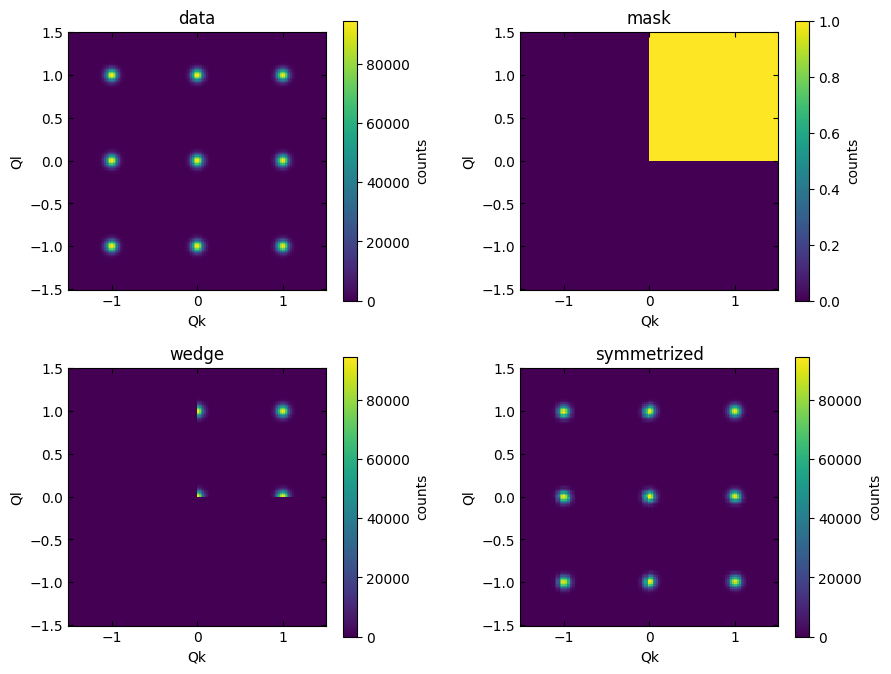

(<Figure size 1000x800 with 8 Axes>,
 array([[<Axes: title={'center': 'data'}, xlabel='Qk', ylabel='Ql'>,
         <Axes: title={'center': 'mask'}, xlabel='Qk', ylabel='Ql'>],
        [<Axes: title={'center': 'wedge'}, xlabel='Qk', ylabel='Ql'>,
         <Axes: title={'center': 'symmetrized'}, xlabel='Qk', ylabel='Ql'>]],
       dtype=object))

In [16]:
s.plane3symmetrizer.set_parameters(theta_min=0, theta_max=90, mirror=False)
s.plane3symmetrizer.test(data[len(data.Qh)//2,:,:])

In [ ]:
s.symmetrize()

Symmetrizing QhQk planes...
